<a href="https://colab.research.google.com/github/bentech28/AI-E-101-May-17--2024---Bounyamine-Baparape/blob/main/1C_Case_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 156 Script 1C-Case Studies.py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Topic 1 - Flight delays out of LaGuardia airport

### Import of dataset

In [ ]:
Delays = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/FlightDelays.csv")


In [ ]:
Delays.head(10)

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No
5,6,UA,669,ORD,4-8am,Fri,May,150,0,No
6,7,UA,673,ORD,8-Noon,Fri,May,158,-5,No
7,8,UA,677,ORD,8-Noon,Fri,May,160,0,No
8,9,UA,679,ORD,Noon-4pm,Fri,May,160,10,No
9,10,UA,681,ORD,Noon-4pm,Fri,May,163,60,Yes


### lots of observations and 10 columns

In [ ]:
print(Delays.shape)   # lots of observations and 10 columns

(4029, 10)


### how many ***observations***

In [ ]:
print(len(Delays))    # how many observations

4029


### a data frame is a list of columns with this length

In [ ]:
print(Delays.columns) # a data frame is a list of columns with this length

Index(['ID', 'Carrier', 'FlightNo', 'Destination', 'DepartTime', 'Day',
       'Month', 'FlightLength', 'Delay', 'Delayed30'],
      dtype='object')


 ### factor variable

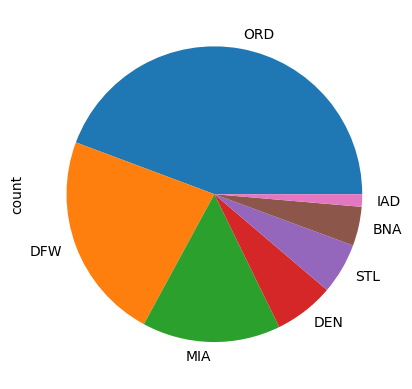

In [ ]:
Delays['Destination'].value_counts().plot(kind='bar')  # factor variable
plt.show()

### a contingency table from two factors

In [ ]:
print(pd.crosstab(Delays['Day'], Delays['Delayed30'])) # a contingency table from two factors

Delayed30   No  Yes
Day                
Fri        493  144
Mon        569   61
Sat        406   47
Sun        507   44
Thu        434  132
Tue        535   93
Wed        488   76


### mean of a numeric vector column

In [ ]:
print(Delays['Delay'].mean())  # mean of a numeric vector column

11.73790022338049


### negative - the data must be skewed

In [ ]:
print(Delays['Delay'].median())  # negative - the data must be skewed

-3.0


### long tail

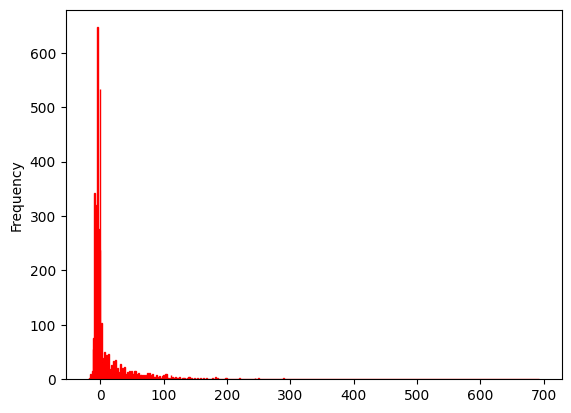

In [ ]:
Delays['Delay'].plot(kind='hist', bins='fd', edgecolor='red')   # long tail
plt.show()

## Birth Weights of babies in North Carolina

In [ ]:
NCB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CODE/NCBirths2004.csv")
print(NCB.head())

   ID MothersAge Tobacco Alcohol  Gender  Weight  Gestation Smoker
0   1      30-34      No      No    Male    3827         40     No
1   2      30-34      No      No    Male    3629         38     No
2   3      35-39      No      No  Female    3062         37     No
3   4      20-24      No      No  Female    3430         39     No
4   5      25-29      No      No    Male    3827         38     No


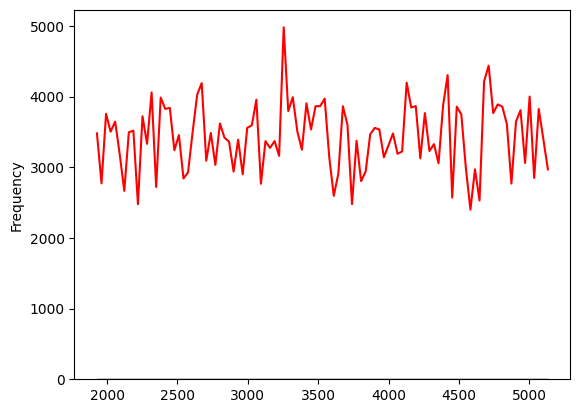

In [ ]:
NCB['Weight'].plot(kind='hist', bins='fd', density=True, edgecolor='black')  # not badly skewed; "FD" gives more bars than the default
# Compare our sample with a probability model for the population
x = np.linspace(NCB['Weight'].min(), NCB['Weight'].max(), 100)
plt.plot(x, np.random.normal(NCB['Weight'].mean(), NCB['Weight'].std(), 100), color='red') # overlay a normal distribution
plt.show()

The fit is pretty good, but it's hard to credit the Central Limit Theorem!

### There are lots of ways to split up these data

In [ ]:
byGender = NCB.groupby('Gender')['Weight']
print(byGender.mean())  # applies mean() to each item in the list

Gender
Female    3398.316699
Male      3501.579918
Name: Weight, dtype: float64


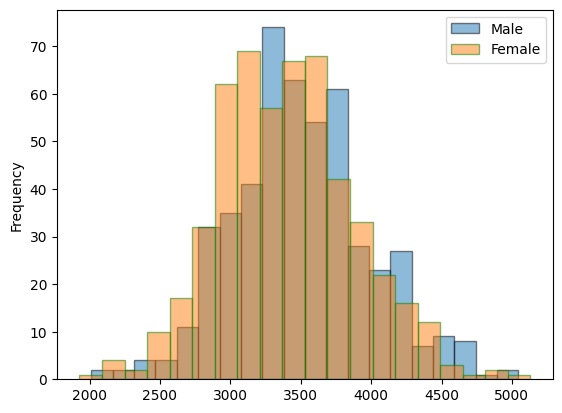

In [ ]:
NCB[NCB['Gender'] == 'Male']['Weight'].plot(kind='hist', bins='fd', alpha=0.5, label='Male', edgecolor='black')
NCB[NCB['Gender'] == 'Female']['Weight'].plot(kind='hist', bins='fd', alpha=0.5, label='Female', edgecolor='green')
plt.legend()
plt.show()


### We might guess at relationships from a scatter plot

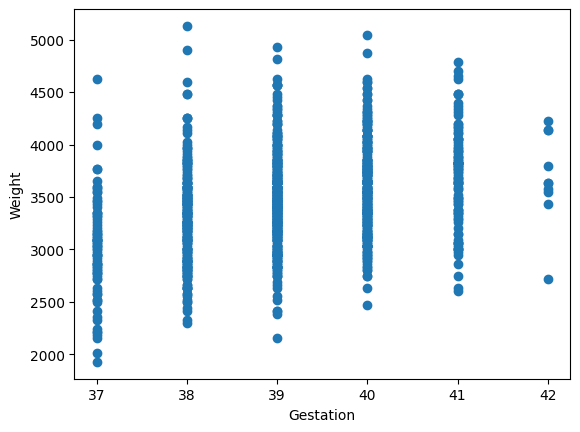

In [ ]:
# We might guess at relationships from a scatter plot
plt.scatter(NCB['Gestation'], NCB['Weight'])
plt.xlabel('Gestation')
plt.ylabel('Weight')
plt.show()

### Or we can split the data and plot the means

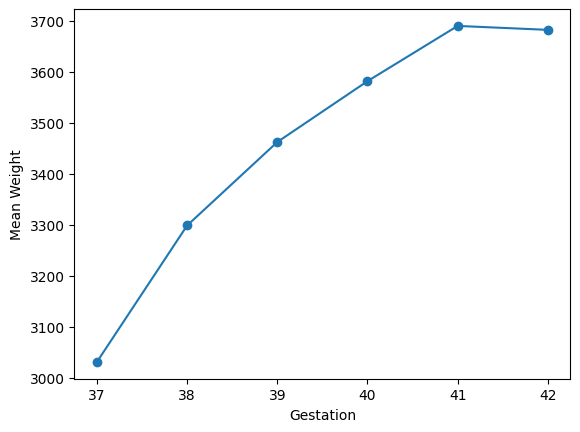

In [ ]:
# Or we can split the data and plot the means
byGest = NCB.groupby('Gestation')['Weight'].mean()
plt.plot(byGest.index, byGest.values, marker='o')
plt.xlabel('Gestation')
plt.ylabel('Mean Weight')
plt.show()

## Topic 2 - A quick look at other datasets

In [ ]:
Verizon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/Verizon.csv")
print(Verizon.head())

    Time Group
0  17.50  ILEC
1   2.40  ILEC
2   0.00  ILEC
3   0.65  ILEC
4  22.23  ILEC


### Here is another way to separate the data by factor

#### small subset of non-Verizon customers

In [ ]:
print(Verizon.loc[Verizon['Group'] == 'CLEC', 'Time'].mean())  # small subset of non-Verizon customers

16.50913043478261


 #### significantly less for Verizon customers?

In [ ]:
print(Verizon.loc[Verizon['Group'] == 'ILEC', 'Time'].mean())  # significantly less for Verizon customers?

8.411610576923076


### General Social Survey

In [ ]:
# General Social Survey
GSS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/GSS2002.csv")
print(GSS.head())  # lots of columns

   ID         Region  Gender   Race  Education    Marital  \
0   1  South Central  Female  White         HS   Divorced   
1   2  South Central    Male  White  Bachelors    Married   
2   3  South Central  Female  White         HS  Separated   
3   4  South Central  Female  White    Left HS   Divorced   
4   5  South Central    Male  White    Left HS   Divorced   

                  Religion         Happy       Income       PolParty  ...  \
0  Inter-nondenominational  Pretty happy  30000-34999     Strong Rep  ...   
1               Protestant  Pretty happy  75000-89999    Not Str Rep  ...   
2               Protestant           NaN  35000-39999     Strong Rep  ...   
3               Protestant           NaN  50000-59999  Ind, Near Dem  ...   
4               Protestant           NaN  40000-49999            Ind  ...   

   Marijuana DeathPenalty OwnGun  GunLaw SpendMilitary   SpendEduc  \
0        NaN        Favor     No   Favor    Too little  Too little   
1  Not legal        Favor    Y

### look at just one factor

In [ ]:
print(GSS['Politics'].value_counts())  # look at just one factor

Politics
Moderate                  522
Conservative              210
Slightly conservative     209
Slightly liberal          159
Liberal                   143
Extremely liberal          47
Extremely conservative     41
Name: count, dtype: int64


### contingency table for two factors

In [ ]:
print(pd.crosstab(GSS['Politics'], GSS['OwnGun']))
# No numeric variables; lots of contingency tables and proportions

OwnGun                   No  Refused  Yes
Politics                                 
Conservative             79        4   59
Extremely conservative   13        1    8
Extremely liberal        21        0    8
Liberal                  76        0   22
Moderate                229        1  131
Slightly conservative    94        3   46
Slightly liberal         73        0   29


### Beer and Hot Wings - data from a bar in Minneapolis

In [ ]:
BW = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/Beerwings.csv")
print(BW.head())

   ID  Hotwings  Beer Gender
0   1         4    24      F
1   2         5     0      F
2   3         5    12      F
3   4         6    12      F
4   5         7    12      F


In [ ]:
print(BW.loc[BW['Gender'] == 'F', 'Beer'].mean())

22.0


In [ ]:
print(BW.loc[BW['Gender'] != 'F', 'Beer'].mean())

30.4


#### Do men drink significantly more beer?

### Black Spruce Seedlings - the result of a controlled experiment

In [ ]:
# Black Spruce Seedlings - the result of a controlled experiment
BS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/Spruce.csv")
print(BS.head())


   Tree Competition Fertilizer  Height0  Height5  Diameter0  Diameter5  \
0     1          NC          F     15.0     60.0   1.984375        7.4   
1     2          NC          F      9.0     45.2   1.190625        5.2   
2     3          NC          F     12.0     42.0   1.785937        5.7   
3     4          NC          F     13.7     49.5   1.587500        6.4   
4     5          NC          F     12.0     47.3   1.587500        6.2   

   Ht.change  Di.change  
0       45.0   5.415625  
1       36.2   4.009375  
2       30.0   3.914062  
3       35.8   4.812500  
4       35.3   4.612500  


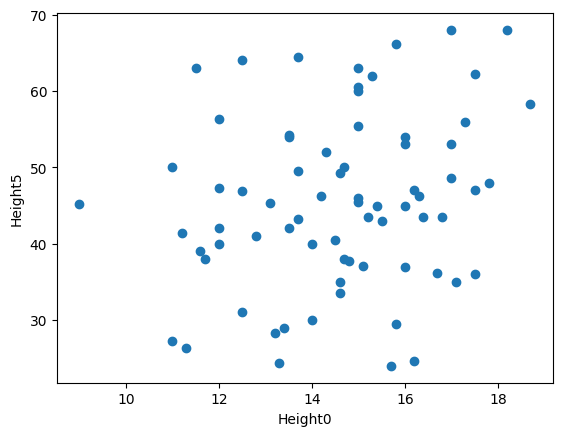

0.21835116683211364


In [ ]:
plt.scatter(BS['Height0'], BS['Height5'])  # possible linear relationship?
plt.xlabel('Height0')
plt.ylabel('Height5')
plt.show()
print(np.corrcoef(BS['Height0'], BS['Height5'])[0, 1])  # is this correlation significant?

### We can apply mean() to one column separately for each factor in a second column

In [ ]:
print(BS.groupby('Fertilizer')['Ht.change'].mean())  # does fertilizer help?

Fertilizer
F     38.288889
NF    23.577778
Name: Ht.change, dtype: float64


In [ ]:
print(BS.groupby('Competition')['Ht.change'].mean())  # does competition hurt?

Competition
C     25.702778
NC    36.163889
Name: Ht.change, dtype: float64


In [ ]:
# We can even consider a pair of factors and make a table
print(BS.pivot_table(values='Ht.change', index='Fertilizer', columns='Competition', aggfunc='mean'))  # combination of factors


Competition          C         NC
Fertilizer                       
F            33.805556  42.772222
NF           17.600000  29.555556
